# Pandas Groupby and Friends

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'retina'

## Read the Earthquake Dataset

In [3]:
df = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv', parse_dates=['time'], index_col='id')

In [4]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [5]:
df['country'] = df.place.str.split(', ').str[-1]

In [6]:
df_all = df
df_small = df[df.mag<4]
df = df[df.mag>=4]

## An Example

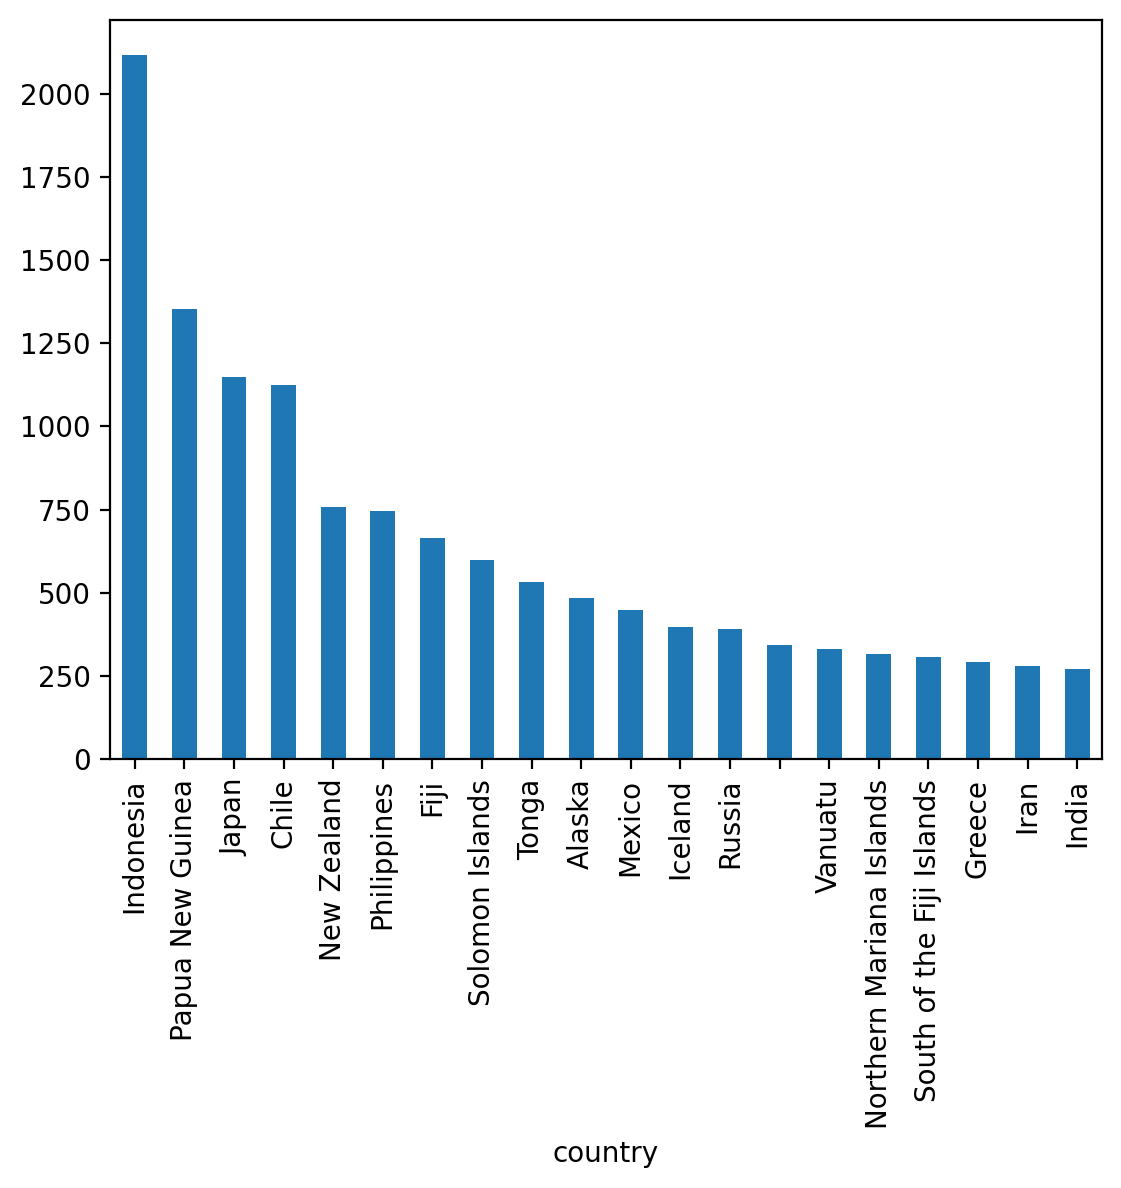

In [7]:
df.groupby('country').mag.count().nlargest(20).plot(kind='bar');

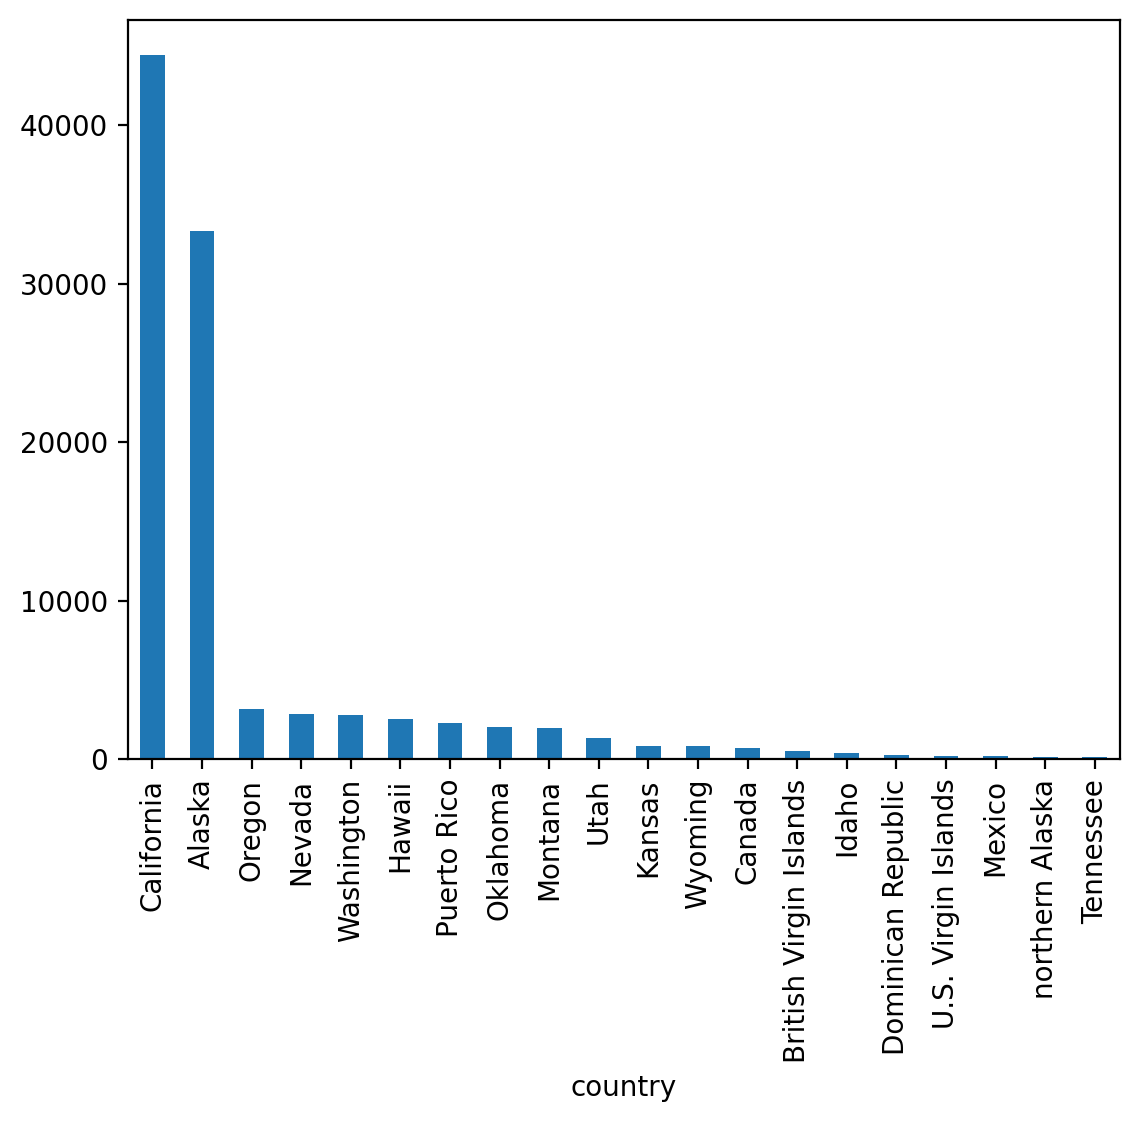

In [8]:
df_small.groupby('country').mag.count().nlargest(20).plot(kind='bar');

## Groupby

In [9]:
df.groupby(df.country)

In [10]:
gb = df.groupby('country')

In [11]:
len(gb)

269

In [12]:
list(gb.groups.keys())

['',
 'Afghanistan',
 'Alaska',
 'Albania',
 'Algeria',
 'American Samoa',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Argentina',
 'Arizona',
 'Aruba',
 'Ascension Island region',
 'Australia',
 'Azerbaijan',
 'Azores Islands region',
 'Azores-Cape St. Vincent Ridge',
 'Balleny Islands region',
 'Banda Sea',
 'Bangladesh',
 'Barbados',
 'Barbuda',
 'Bay of Bengal',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Bouvet Island',
 'Bouvet Island region',
 'Brazil',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Burma',
 'Burundi',
 'California',
 'Canada',
 'Cape Verde',
 'Carlsberg Ridge',
 'Cayman Islands',
 'Celebes Sea',
 'Central East Pacific Rise',
 'Central Mid-Atlantic Ridge',
 'Chagos Archipelago region',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Crozet Islands region',
 'Cuba',
 'Cyprus',
 'Davis Strait',
 'Democratic Republic of the Congo',
 'Djibouti',
 'Dominica',
 'Dominican Republic',


## Iterating and Selecting Groups

In [13]:
for key, group in gb:
    if key=='Zambia':
        display(group.head())

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000nae1,2014-03-03 02:05:14.940,-14.9909,26.9490,10.00,4.1,mb,NaN,73.0,1.230,1.04,us,2014-05-13T21:36:49.000Z,"12km W of Mumbwa, Zambia",earthquake,Zambia
usb000qkrv,2014-04-21 07:23:22.870,-13.9263,23.3613,10.00,4.6,mb,NaN,95.0,4.862,1.37,us,2014-07-04T01:34:51.000Z,"50km SSE of Zambezi, Zambia",earthquake,Zambia
usc000rl1c,2014-06-08 02:40:23.530,-12.2730,25.8226,10.00,4.1,mb,NaN,96.0,3.768,1.44,us,2014-08-30T17:03:01.000Z,"62km W of Solwezi, Zambia",earthquake,Zambia
usb000rwz0,2014-07-24 19:45:55.260,-14.1291,25.6871,13.98,4.6,mb,NaN,43.0,2.676,0.57,us,2014-10-25T01:49:35.000Z,"75km SSW of Kasempa, Zambia",earthquake,Zambia
usb000rwu1,2014-07-14 13:21:01.630,-13.0528,26.3914,14.13,4.4,mb,NaN,99.0,2.815,1.51,us,2014-10-10T08:02:18.000Z,"75km NE of Kasempa, Zambia",earthquake,Zambia


In [14]:
gb.get_group('Chile').head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mqlq,2014-01-31 20:00:16.000,-33.6550,-71.9810,25.10,4.5,mb,NaN,NaN,NaN,1.63,us,2014-04-08T01:43:19.000Z,"34km WSW of San Antonio, Chile",earthquake,Chile
usc000mql6,2014-01-31 13:48:23.000,-18.0690,-69.6630,149.10,4.3,mb,NaN,NaN,NaN,1.77,us,2014-04-08T01:43:18.000Z,"17km NW of Putre, Chile",earthquake,Chile
usc000mqk8,2014-01-30 14:20:56.560,-19.6118,-70.9487,15.16,4.1,mb,NaN,159.0,1.227,1.34,us,2014-04-08T01:43:17.000Z,"107km NW of Iquique, Chile",earthquake,Chile
usc000mdi2,2014-01-30 10:02:14.000,-32.1180,-71.7860,25.70,4.5,mwr,NaN,NaN,NaN,1.10,us,2015-01-30T21:28:21.955Z,"64km NW of La Ligua, Chile",earthquake,Chile
usc000mqeh,2014-01-29 18:58:23.000,-18.6610,-69.6440,123.10,4.8,mb,NaN,NaN,NaN,1.52,us,2014-04-08T01:43:16.000Z,"51km S of Putre, Chile",earthquake,Chile


## Extracting Groups

In [15]:
gb.get_group('Mexico')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mh8c,2014-01-31 16:04:05.800,16.6660,-94.8550,96.10,4.1,mb,NaN,NaN,NaN,0.59,us,2014-04-08T01:43:18.000Z,"21km N of Union Hidalgo, Mexico",earthquake,Mexico
usc000mh7w,2014-01-28 16:14:27.630,24.2514,-111.8042,10.00,4.0,mb,NaN,244.0,1.374,1.11,us,2014-03-27T18:15:46.000Z,"88km S of Ciudad Constitucion, Mexico",earthquake,Mexico
usc000mhem,2014-01-28 03:04:33.800,14.3260,-93.8790,16.10,4.1,mb,NaN,NaN,NaN,1.60,us,2014-03-27T18:15:45.000Z,"161km SW of Mapastepec, Mexico",earthquake,Mexico
usc000mheb,2014-01-27 04:06:30.320,27.7412,-105.3773,10.00,4.0,md,NaN,134.0,0.842,0.66,us,2014-03-27T18:15:44.000Z,"15km SE of Naica, Mexico",earthquake,Mexico
usb000m8kh,2014-01-26 23:00:55.780,27.7150,-105.6163,12.18,4.1,mb,NaN,84.0,0.778,1.10,us,2014-03-27T18:15:43.000Z,"19km SW of Naica, Mexico",earthquake,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usb000t2dz,2014-12-03 05:47:08.600,17.5340,-92.4760,9.10,4.5,mb,NaN,NaN,NaN,1.38,us,2015-02-28T02:16:05.040Z,"14km N of Tila, Mexico",earthquake,Mexico
usc000tdt3,2014-12-03 04:05:56.100,15.9820,-98.4320,17.00,4.2,md,NaN,NaN,NaN,0.75,us,2015-02-28T02:16:05.040Z,"53km S of Cuajinicuilapa, Mexico",earthquake,Mexico
usb000t260,2014-12-02 13:51:11.610,22.0892,-108.3915,10.00,4.3,mb,NaN,216.0,8.376,0.88,us,2015-02-24T00:35:16.040Z,"171km SE of San Jose del Cabo, Mexico",earthquake,Mexico


In [16]:
two_groups = df[(df.country=='Mexico') | (df.country=='Canada')]

In [17]:
two_groups.groupby('country').groups.keys()

dict_keys(['Canada', 'Mexico'])

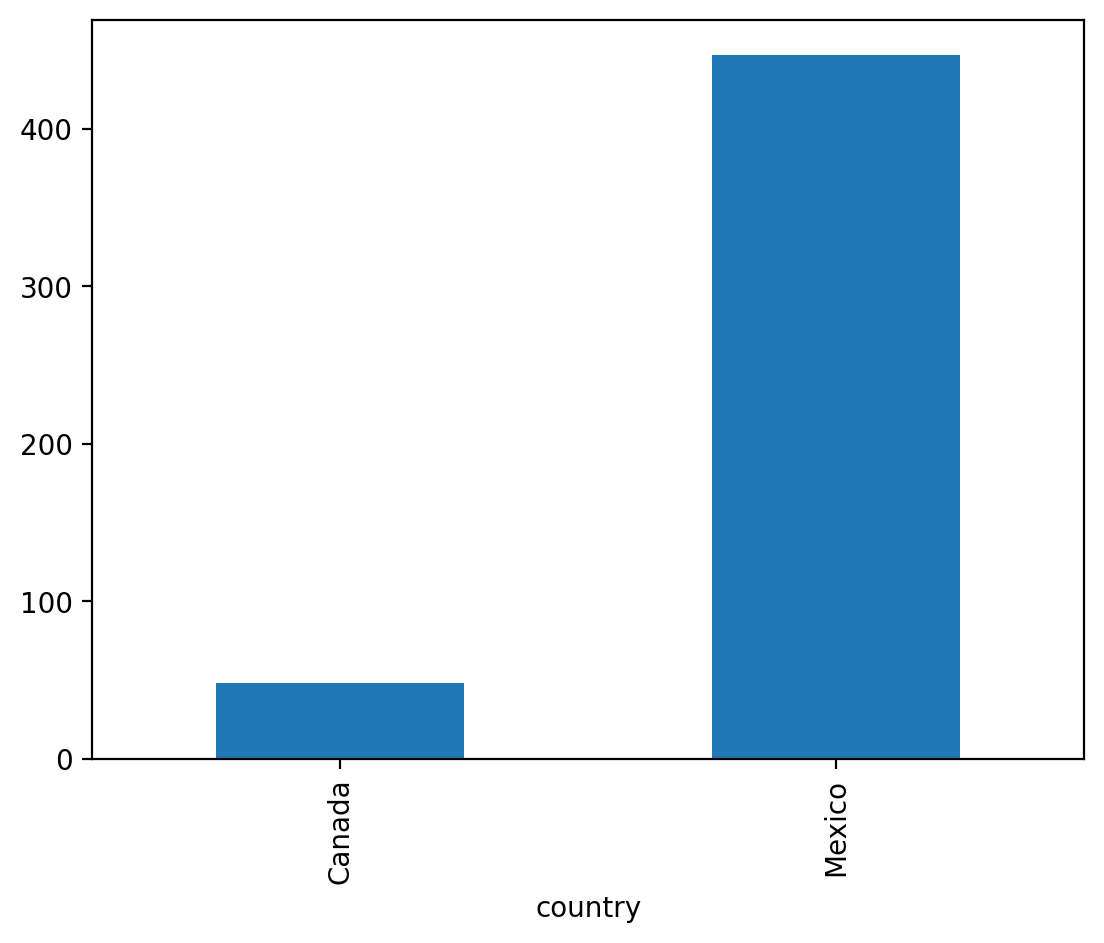

In [18]:
two_groups.groupby('country').mag.count().plot(kind='bar');

In [19]:
two_countries_list = []
for key, group in gb:
    if key=='Canada' or key=='Mexico':
        two_countries_list.append(group)
        print(key)

Canada
Mexico


In [20]:
two_countries_df = pd.concat(two_countries_list)

In [21]:
two_countries_df.groupby('country').groups.keys()

dict_keys(['Canada', 'Mexico'])

## Aggregation

In [22]:
gb.aggregate(np.max).head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
country,,,,,,,,,,,,,,
,2014-12-31 14:49:19.200,-37.5219,78.9418,248.18,6.9,mww,NaN,195.0,28.762,1.47,us,2015-03-17T02:38:27.040Z,"99km NW of Visokoi Island,",earthquake
Afghanistan,2014-12-27 06:37:50.010,37.1001,72.5981,248.39,5.6,mww,NaN,172.0,3.505,1.55,us,2015-06-22T20:12:10.712Z,"9km WNW of Mazar-e Sharif, Afghanistan",earthquake
Alaska,2014-12-30 21:22:21.580,69.2345,179.9288,266.61,7.9,mww,152.0,341.0,7.712,3.30,us,2015-05-30T05:34:08.822Z,"9km WSW of Little Sitkin Island, Alaska",earthquake
Albania,2014-05-20 04:43:25.500,41.5300,20.2804,28.26,5.0,mwr,NaN,69.0,1.299,1.34,us,2015-01-30T15:28:03.533Z,"6km NE of Durres, Albania",earthquake
Algeria,2014-12-26 17:55:18.140,36.9391,5.6063,21.40,5.5,mww,NaN,179.0,3.250,1.45,us,2015-03-17T02:37:18.040Z,"5km SSW of Bougara, Algeria",earthquake


In [23]:
gb.mag.aggregate(np.max).head()

country
               6.9
Afghanistan    5.6
Alaska         7.9
Albania        5.0
Algeria        5.5
Name: mag, dtype: float64

In [24]:
gb.mag.aggregate(np.max).nlargest(10)

country
Chile                         8.2
Alaska                        7.9
Solomon Islands               7.6
Papua New Guinea              7.5
El Salvador                   7.3
Mexico                        7.2
Fiji                          7.1
Indonesia                     7.1
Southern East Pacific Rise    7.0
                              6.9
Name: mag, dtype: float64

In [25]:
gb.mag.max().nlargest(10)

country
Chile                         8.2
Alaska                        7.9
Solomon Islands               7.6
Papua New Guinea              7.5
El Salvador                   7.3
Mexico                        7.2
Fiji                          7.1
Indonesia                     7.1
Southern East Pacific Rise    7.0
                              6.9
Name: mag, dtype: float64

In [26]:
gb.mag.mean().nlargest(10)

country
South Napa Earthquake          6.020000
Bouvet Island region           5.750000
South Georgia Island region    5.450000
Barbados                       5.400000
Easter Island region           5.162500
Malawi                         5.100000
Drake Passage                  5.033333
North Korea                    5.000000
Saint Lucia                    5.000000
Pacific-Antarctic Ridge        4.923214
Name: mag, dtype: float64

In [27]:
gb.mag.aggregate([np.min, np.max, np.mean]).head()

,amin,amax,mean
country,,,
,4.0,6.9,4.572384
Afghanistan,4.0,5.6,4.340816
Alaska,4.0,7.9,4.430247
Albania,4.0,5.0,4.335714
Algeria,4.0,5.5,4.466667


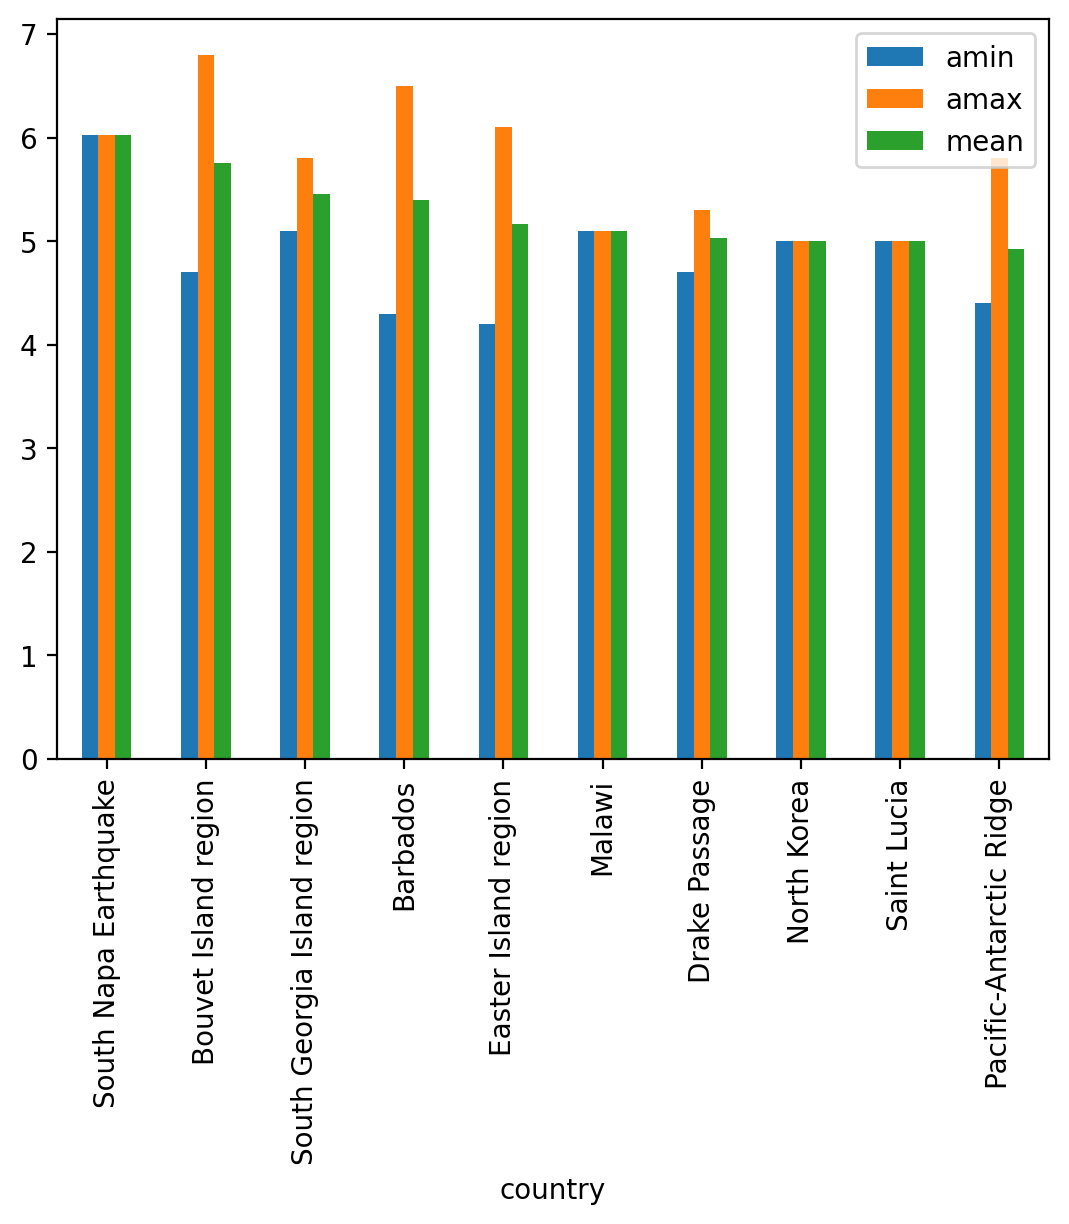

In [28]:
gb.mag.aggregate([np.min, np.max, np.mean]).nlargest(10, 'mean').plot(kind='bar');

## Transformation

In [29]:
def standardize(x):
    return (x - x.mean())/x.std()

In [30]:
mag_standardized = gb.mag.transform(standardize)

In [31]:
mag_standardized

id
usc000mqlp   -0.831361
usc000mqln   -0.604849
usc000mqls   -0.253448
usc000mf1x   -0.498647
usc000mqlm   -0.587553
                ...   
usc000t6yh   -0.162547
usc000t6y2   -0.315373
usc000t6y1   -0.577982
usb000t1gp   -0.356534
usc000t6yn    0.068357
Name: mag, Length: 17547, dtype: float64

## Time Grouping

In [32]:
import urllib
import pandas as pd

header_url = 'ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/HEADERS.txt'
with urllib.request.urlopen(header_url) as response:
    data = response.read().decode('utf-8')
lines = data.split('\n')
headers = lines[1].split(' ')

ftp_base = 'ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/'
dframes = []
for year in range(2016, 2019):
    data_url = f'{year}/CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(ftp_base + data_url, parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')

In [33]:
df

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY,
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,64756,2.422,-73.74,41.79,3.4,-0.5,1.5,1.3,0.0,1.69,...,0.233,0.204,0.155,0.147,4.2,4.4,5.1,6.0,7.6,NaN
2016-01-02,64756,2.422,-73.74,41.79,2.9,-3.6,-0.4,-0.3,0.0,6.25,...,0.227,0.199,0.152,0.144,2.8,3.1,4.2,5.7,7.4,NaN
2016-01-03,64756,2.422,-73.74,41.79,5.1,-1.8,1.6,1.1,0.0,5.69,...,0.223,0.196,0.151,0.141,2.6,2.8,3.8,5.2,7.2,NaN
2016-01-04,64756,2.422,-73.74,41.79,0.5,-14.4,-6.9,-7.5,0.0,9.17,...,0.220,0.194,0.148,0.139,1.7,2.1,3.4,4.9,6.9,NaN
2016-01-05,64756,2.422,-73.74,41.79,-5.2,-15.5,-10.3,-11.7,0.0,9.34,...,0.213,0.191,0.148,0.138,0.4,0.9,2.4,4.3,6.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,64756,2.622,-73.74,41.79,2.5,-2.1,0.2,0.3,0.0,7.50,...,0.275,0.248,0.191,0.192,1.3,1.4,1.9,3.2,4.7,NaN
2018-12-28,64756,2.622,-73.74,41.79,11.6,1.9,6.8,7.6,11.5,0.45,...,0.295,0.261,0.193,0.191,2.9,2.7,2.5,3.1,4.5,NaN
2018-12-29,64756,2.622,-73.74,41.79,11.3,-2.1,4.6,6.3,0.0,4.89,...,0.295,0.270,0.208,0.191,4.5,4.4,4.0,3.8,4.5,NaN


<AxesSubplot: xlabel='LST_DATE'>

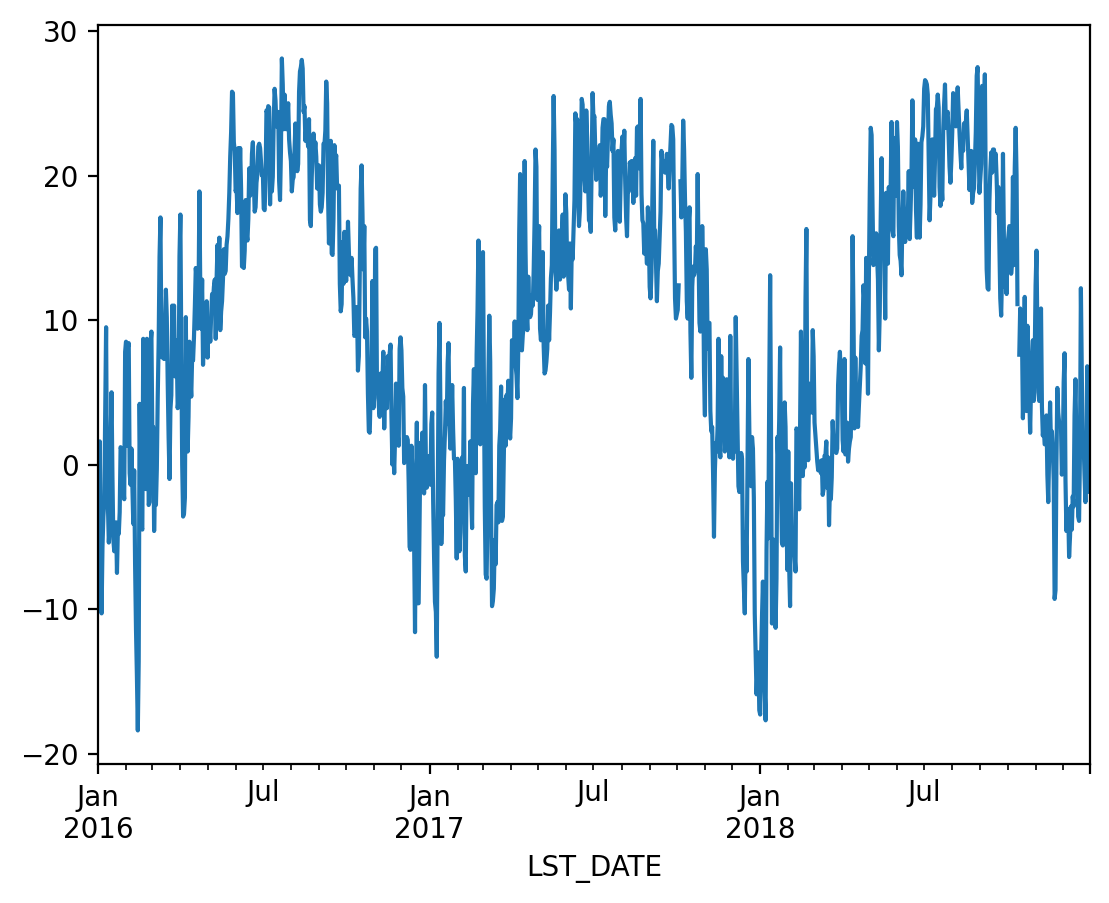

In [34]:
df.T_DAILY_MEAN.plot()

In [35]:
df.groupby(df.index.month).mean(numeric_only=True)

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY,
LST_DATE,,,,,,,,,,,,,,,,,,,,,
1,64756.0,2.488667,-73.74,41.79,2.924731,-7.122581,-2.100000,-1.905376,2.478495,5.812258,...,0.240250,0.200698,0.153645,0.160859,0.150538,0.248387,0.788172,1.766667,3.364516,NaN
2,64756.0,2.487882,-73.74,41.79,6.431765,-5.015294,0.712941,1.022353,4.077647,8.495882,...,0.247714,0.210044,0.159153,0.163889,1.216471,1.169412,1.278824,1.617647,2.442353,NaN
3,64756.0,2.488667,-73.74,41.79,7.953763,-3.035484,2.455914,2.643011,2.788172,13.211290,...,0.228612,0.203634,0.157796,0.160366,3.450538,3.400000,3.372043,3.480645,3.777419,NaN
4,64756.0,2.488667,-73.74,41.79,14.793333,1.816667,8.302222,8.574444,2.396667,15.295889,...,0.214067,0.195844,0.153878,0.158100,9.415556,9.117778,8.455556,7.618889,6.670000,NaN
5,64756.0,2.488667,-73.74,41.79,21.235484,8.460215,14.850538,15.121505,3.015054,17.288602,...,0.204796,0.187097,0.148871,0.155720,16.934409,16.640860,15.612903,14.208602,12.455914,NaN
6,64756.0,2.488667,-73.74,41.79,25.627778,11.837778,18.733333,19.026667,3.053333,21.913333,...,0.136911,0.135211,0.129422,0.152711,22.403333,22.126667,20.956667,19.448889,17.552222,NaN
7,64756.0,2.488667,-73.74,41.79,28.568817,15.536559,22.054839,22.012903,3.865591,21.570645,...,0.105806,0.095204,0.114419,0.150000,25.448387,25.318280,24.163441,22.746237,21.068817,NaN
8,64756.0,2.488667,-73.74,41.79,27.473118,15.351613,21.410753,21.378495,4.480645,18.493333,...,0.156161,0.132333,0.128796,0.158750,24.758065,24.829032,24.116129,23.325806,22.301075,NaN
9,64756.0,2.488667,-73.74,41.79,24.084444,12.032222,18.057778,17.866667,3.730000,13.625667,...,0.136900,0.126422,0.121356,0.154000,21.028889,21.168889,20.921111,20.834444,20.707778,NaN


In [36]:
monthly_climatology = df.groupby(df.index.month).aggregate({'T_DAILY_MEAN': 'mean', 'T_DAILY_MAX': 'max', 'T_DAILY_MIN': 'min'})

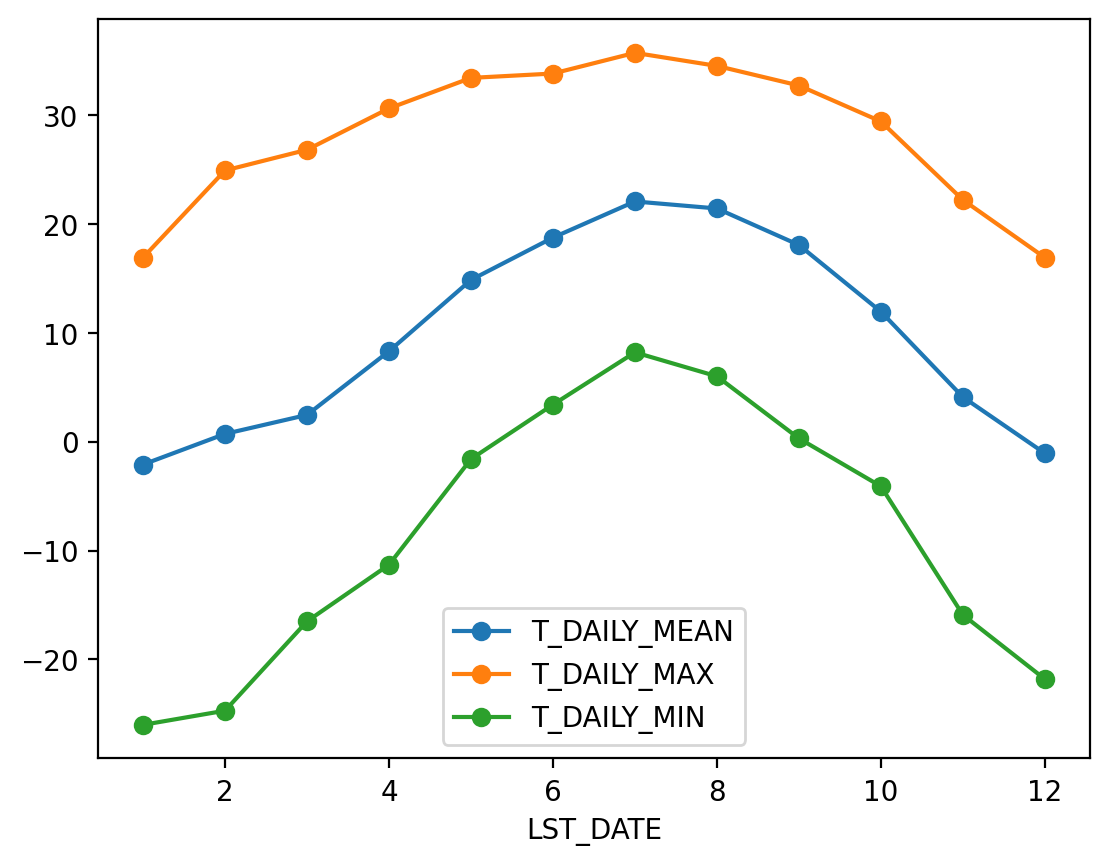

In [37]:
monthly_climatology.plot(marker='o');

In [38]:
daily_climatology = df.groupby(df.index.dayofyear).aggregate({'T_DAILY_MEAN': 'mean', 'T_DAILY_MAX': 'max', 'T_DAILY_MIN': 'min'})

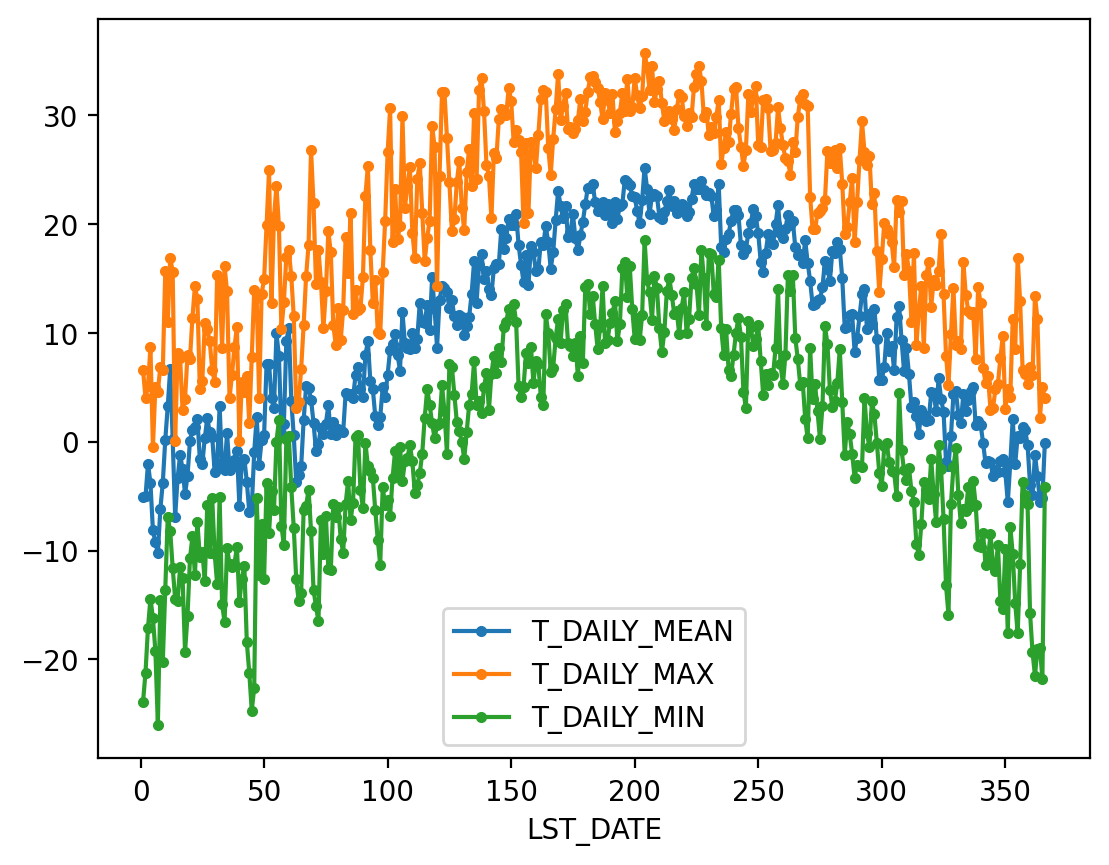

In [39]:
daily_climatology.plot(marker='.');

In [40]:
whos

Variable              Type                Data/Info
---------------------------------------------------
daily_climatology     DataFrame                     T_DAILY_MEAN  T<...>n\n[366 rows x 3 columns]
data                  str                 1 2 3 4 5 6 7 8 9 10 11 1<...>elsius Celsius Celsius \n
data_url              str                 2018/CRND0103-2018-NY_Millbrook_3_W.txt
df                    DataFrame                       WBANNO  CRX_V<...>n[1096 rows x 28 columns]
df_all                DataFrame                                    <...>120108 rows x 15 columns]
df_small              DataFrame                                    <...>102518 rows x 15 columns]
dframes               list                n=3
ftp_base              str                 ftp://ftp.ncdc.noaa.gov/p<...>a/uscrn/products/daily01/
gb                    DataFrameGroupBy    <pandas.core.groupby.gene<...>object at 0x7f4432abad90>
group                 DataFrame                                    <...>thquake  w

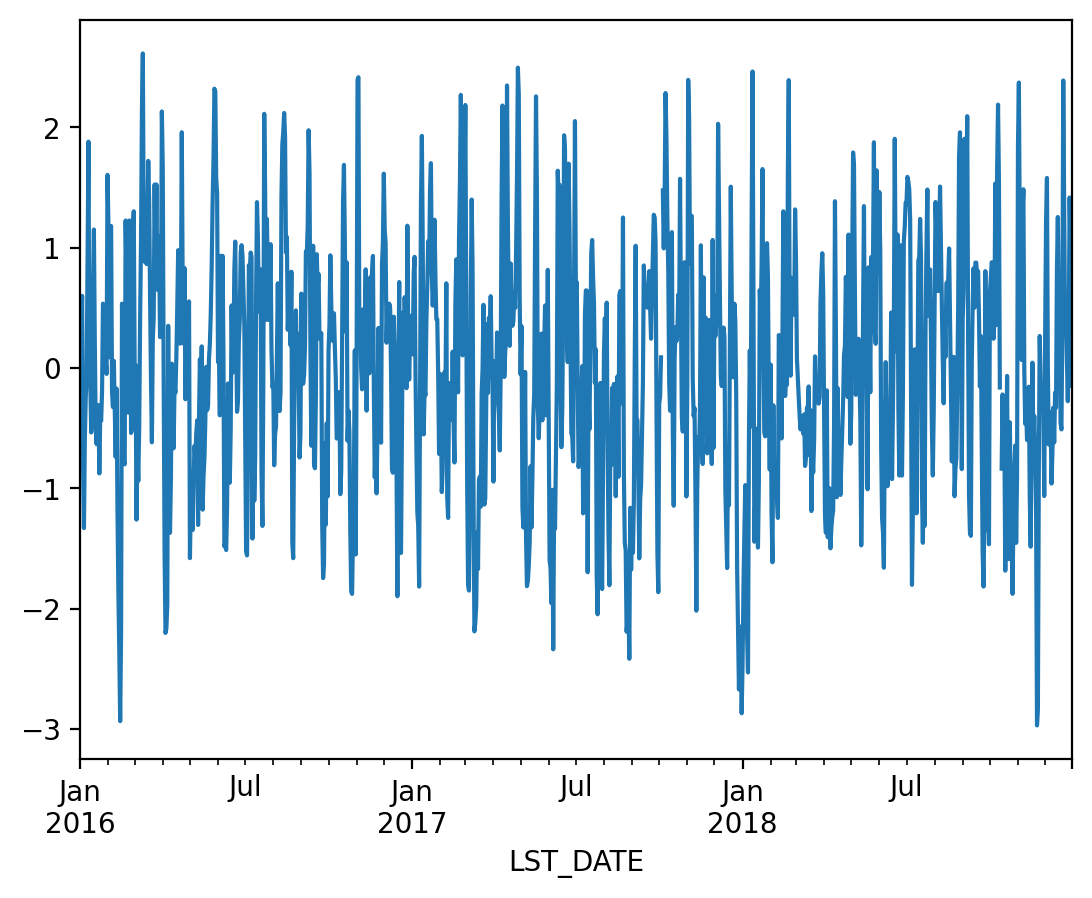

In [41]:
anomaly = df['T_DAILY_MEAN'].groupby(df.index.month).transform(standardize)
anomaly.plot();

## Resampling

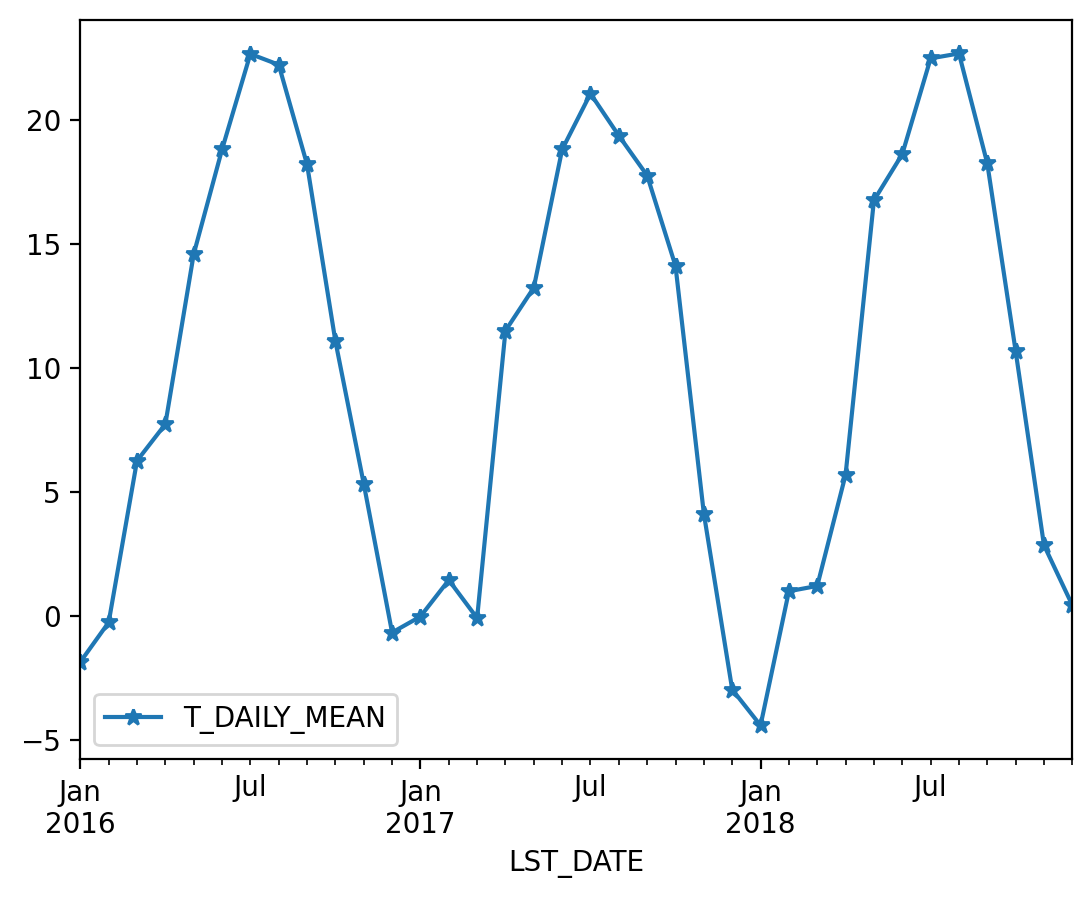

In [42]:
df.resample('M').mean(numeric_only=True).plot(y='T_DAILY_MEAN', marker='*');

## Rolling Operations

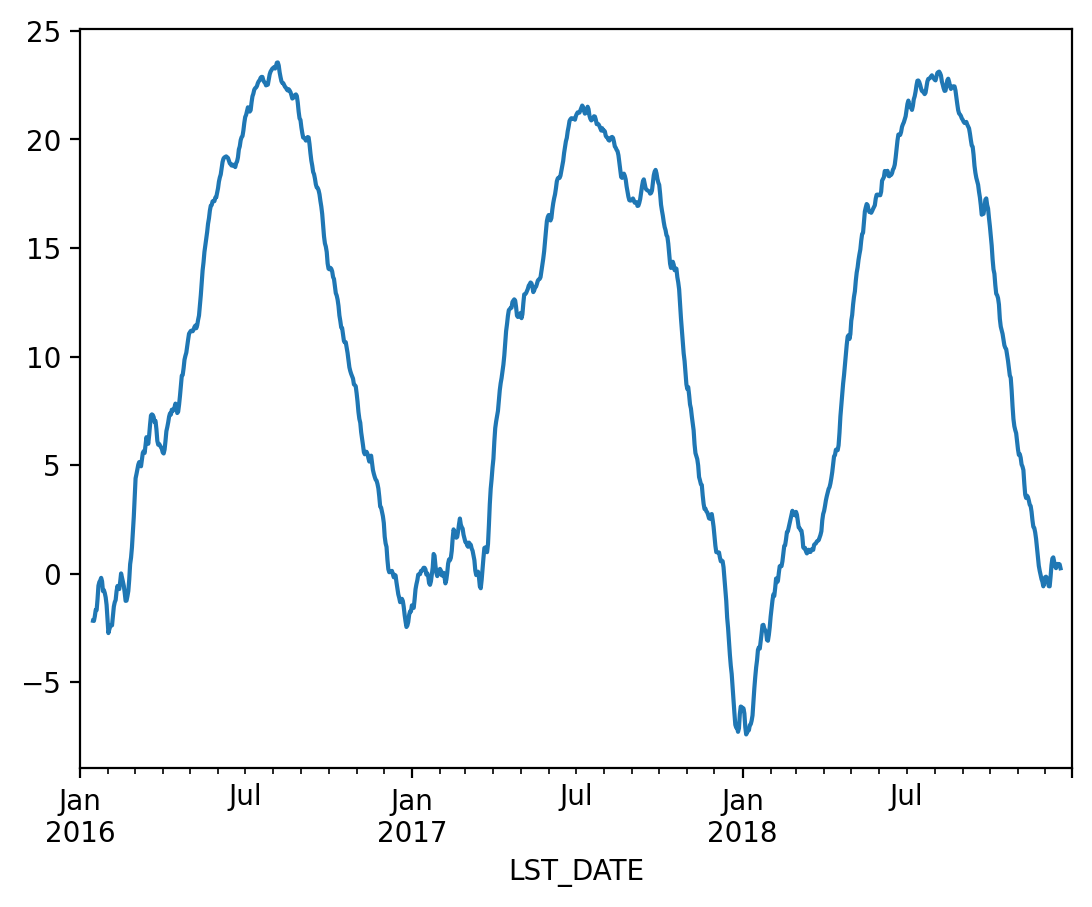

In [43]:
df.rolling(30, center=True, min_periods=29).T_DAILY_MEAN.mean().plot();

In [44]:
df.rolling?

Signature:
df.rolling(
    window: 'int | timedelta | BaseOffset | BaseIndexer',
    min_periods: 'int | None' = None,
    center: 'bool_t' = False,
    win_type: 'str | None' = None,
    on: 'str | None' = None,
    axis: 'Axis' = 0,
    closed: 'str | None' = None,
    step: 'int | None' = None,
    method: 'str' = 'single',
) -> 'Window | Rolling'
Docstring:
Provide rolling window calculations.

Parameters
----------
window : int, offset, or BaseIndexer subclass
    Size of the moving window.

    If an integer, the fixed number of observations used for
    each window.

    If an offset, the time period of each window. Each
    window will be a variable sized based on the observations included in
    the time-period. This is only valid for datetimelike indexes.
    To learn more about the offsets & frequency strings, please see `this link
    <https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases>`__.

    If a BaseIndexer subclass, the window bound